Small data can by typed directly within script. However, we usually keep data as tables in separate files, and those are the most common sources for the analysis and visualisation in python. 
There are many ways of reading files. Here I will show you only a small selection of my vavorites.
There are: 

<font size=3>native file.read(), file.readlines(), numpy.genfromtxt(), and pandas.read()</font>

But before that we create some file to be sure we have something to open. I usually try new scripts with something small and easy to check, and it is advisable to use something small before you try something big and difficult.

Let's make a list of animals living in some facilities like the following.

In [2]:
col_names=["ID","house", "farm", "zoo", "park"]
mice=[1,2,3,4]
cats=[2,1,0,0]
pinguins=[0,0,2,3]
tigers=[0,0,4,0]
rownames=["mice","cats","pinguins","tigers"]
data=[mice,cats,pinguins, tigers]
type(data)

list

We defined some living spaces for animals and their populations. It is not serious at all, and numbers do not matter much at this moment (although I tried to make those values appropriate for given locations). Let's save it to the file. Currently there are two major ways of doing it. One is by using native python functions, open() and writelines(). Another one is using pandas.to_csv() function. Lets use the first option (and the last one will come at the end of this script).

In [3]:
#create new file for writing, "w" stants for "write"
f_out=open("animals.csv", "w") 
f_out.writelines(str(col_names)[1:-1]+"\n") #write col_names and add end of line symbol
#write the rest in a loop
for i in range(len(data)):    
    f_out.writelines(rownames[i]+","+ str(data[i])[1:-1]+"\n")
#close file
f_out.close()

Now we have a file in the same directory as this script. In this case you do not have to mention directory when try to open the file. If your file of interest is in another place, you have to add directory to the name of the file. <br>
Let's open this file as is with function read().

In [4]:
f_in=open("animals.csv","r") # stands for read, it can be also "rb" as read binary, you can also add encoding
data=f_in.read()
f_in.close() #it is still required to close the file manually if you use nadive read() or readline() functions.
print(data)

'ID', 'house', 'farm', 'zoo', 'park'
mice,1, 2, 3, 4
cats,2, 1, 0, 0
pinguins,0, 0, 2, 3
tigers,0, 0, 4, 0



The function read() does not split file on lines or anything. It simply reads the file as it is from the first symbol to the last one. It is useful to check type and length of the variable. Let's do it with data:

In [7]:
print(type(data), len(data), "length")

<class 'str'> 107 length


It means the data file is a one big string with a length of 107 characters, but no lines no columns.

Sure you can split this string by end of line symbol ("/n"), then split it further by commas and so on to recover entire structure of the table. It might feel tedious and lengthy, but python allows to do it in small steps the way you want it. Read() function is useful, when other functions encounter difficulties to open or to read the file properly. It is not practical although if you can use other functions.
It can be done a bit shorter by using readlines() instead.

In [9]:
f_in=open("animals.csv","r") # stands for read, it can be also "rb" as read binary, you can also add encoding
data=f_in.readlines()
f_in.close() #it is still required to close the file manually if you use nadive read() or readline() functions.
#print data as they are
print("data as is ", data)
#print data per line
print("per line")
for line in data:
    print(line)

data as is  ["'ID', 'house', 'farm', 'zoo', 'park'\n", 'mice,1, 2, 3, 4\n', 'cats,2, 1, 0, 0\n', 'pinguins,0, 0, 2, 3\n', 'tigers,0, 0, 4, 0\n']
per line
'ID', 'house', 'farm', 'zoo', 'park'

mice,1, 2, 3, 4

cats,2, 1, 0, 0

pinguins,0, 0, 2, 3

tigers,0, 0, 4, 0



As you can see, a file is properly read by lines, then column names are located in the first line, but we still have to remove end of line symbol ("\n") using rstrip(), and do a bit mor work to collect row names and values in separate categories. Let's try again:

In [11]:
titles=data[0]
rownames, data_table=[],[]
#skip the first line using slicing [1:]
for line in data[1:]:
    values=[]
    items=line.rstrip().split(',')
    rownames.append(items[0])
    for v in items[1:]:
        values.append(float(v))
    data_table.append(values)
#check titles, data, names
print("Places:", titles)
print("data:", data_table)
print("animals:", rownames)

    

Places: 'ID', 'house', 'farm', 'zoo', 'park'

data: [[1.0, 2.0, 3.0, 4.0], [2.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 3.0], [0.0, 0.0, 4.0, 0.0]]
animals: ['mice', 'cats', 'pinguins', 'tigers']


So we have all data back as they were. Sure, you might say, it is still very primitive and lengthy way. Can we do in shorter?

Yes. Let's check the genfromtext() option.

In [14]:
import numpy as np
mytable=np.genfromtxt("animals.csv", dtype=None, encoding="utf-8", delimiter=",", replace_space="")
print(mytable)
type(mytable)

[["'ID'" " 'house'" " 'farm'" " 'zoo'" " 'park'"]
 ['mice' '1' ' 2' ' 3' ' 4']
 ['cats' '2' ' 1' ' 0' ' 0']
 ['pinguins' '0' ' 0' ' 2' ' 3']
 ['tigers' '0' ' 0' ' 4' ' 0']]


numpy.ndarray

Note the new type of the variable: the entire table is a variable of numpy array type. It is not the same as list of lists.
In case of the mixed values in the file table we have to declare all variables as strings or None, not float or int. Othervise part of the data will be lost. (You can replace "None" with "float" and see what will happen). It means, we have to declare values as floats after we have read the table. But let's collect column and row names first:

In [33]:
titles=mytable[0]
print("titles", titles)

titles ["'ID'" " 'house'" " 'farm'" " 'zoo'" " 'park'"]


With this data type you can transpose entire table. This way you can extract row names.

In [16]:
names=(mytable.T)[0]
print("names", names)

names ["'ID'" 'mice' 'cats' 'pinguins' 'tigers']


I ignore for the moment the first element, "ID". It was required to keep all rows the same length during file import. But you can always remove it from the list by slicing or expricitly deleting it. Note, that sometimes your have to convert np.array to list and back depending on the function you try to use.

In [19]:
names=names[1:]
print(names)

['mice' 'cats' 'pinguins' 'tigers']


Finally, you should be able to extract table of values of skipping the first row and the first element in each row, and converting strings to floats

In [51]:
#make str-to-float converting function
def tofloat(mylist):
    new=[float(x) for x in mylist]
    return(new)
mydata_table=[tofloat(x[1:]) for x in mytable[1:]]
print(mydata_table)

[[1.0, 2.0, 3.0, 4.0], [2.0, 1.0, 0.0, 0.0], [0.0, 0.0, 2.0, 3.0], [0.0, 0.0, 4.0, 0.0]]


As you possibly see, we got all three elements of the table as they were.

But can it be done even simpler? Yes, for this purpose we can use pandas.

In [100]:
import pandas as pd
mytable=pd.read_csv("animals.csv", header=0, index_col=0)
print(mytable)
type(mytable)

           'house'   'farm'   'zoo'   'park'
'ID'                                        
mice             1        2       3        4
cats             2        1       0        0
pinguins         0        0       2        3
tigers           0        0       4        0


pandas.core.frame.DataFrame

Here we see a new data type, namely the entire table is a type DataFrame. Those who have an experience with R programming will find many analogies with R function "read.csv". In a way pandas imitate R style to some degree. DataFrame type also exist in R. 

Note, that we declare headers=0, meaning column titles in the 1st row, similarly index_col=0 means that row names are in the 1st column. ID is a name of that names. Technically, we can load the file without ID, this will make the import in pandas a bit more simple. However, it cannot be used for numpy file opening.

All we learned about lists and numpy arraus does not work for DataFrame type. Slicing is generally not the way to get data from this type. How we do it then?
Here is an example

In [101]:
print('row names are called "index"')
print(mytable.index)
print("column names are 'columns'")
print(mytable.columns)
print("data table is in to_numpy")
print(mytable.to_numpy())

row names are called "index"
Index(['mice', 'cats', 'pinguins', 'tigers'], dtype='object', name=''ID'')
column names are columns
Index([' 'house'', ' 'farm'', ' 'zoo'', ' 'park''], dtype='object')
data table is in to_numpy
[[1 2 3 4]
 [2 1 0 0]
 [0 0 2 3]
 [0 0 4 0]]


It is remarkable name for extraction of data. Actually the entire DataFrame variable can be converted to numpy array, which will allow more simple access to any data per row and per column. When needed, numpy array can be further declared as list. And this triade DataFrame-np.array-list can be interconverted at any time you need it.

In [102]:
myarray=np.array(mytable)
print(myarray[1][0:3]) #print values from the second row, first to third

[2 1 0]


Pandas open_csv is useful  when we have a standard table in file without weird stuff. It is also good start for the script is you use **seaborn** graphic package and *statsmodels* package. Those two packages are made in the same R-ish style as pandas and adapted for the DataFrame data input.
Here is an example of seaborn graphics. Use autentic mytable for this

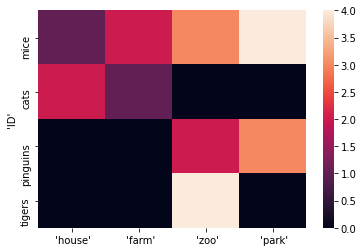

In [103]:
import seaborn as sns
sns.heatmap(mytable);

Note, we have not declared row or column names. Sns graphics finds it automatically. <br> Pandas is very useful for saving data to the file. If data are a kind of a simple table, then it takes very few lines and parameters to make the file you need.
Here is an example

In [91]:
#save data in file in one line, use tab as column separator
pd.DataFrame.to_csv(mytable,"ani.csv", sep="\t")

you can also redefine column names and row names before saving. Or you can skip lines for header and index and save the original data with original names (try it yourself).

In [96]:
mytable.index=['aa','bb','cc','dd']
pd.DataFrame.to_csv(mytable,
                    "ani.csv", 
                    sep="\t", 
                    header=["AA","BB","CC","DD"])

Here I redefined row names (index) and column names (header). I could also redefine the table. This way of saving data is great when you have all data in three pieces: table of values, row names and column names. You stitch them in a few lines and save.
The entire description of the open_csv and to_csv functions is huge and might feel scary. Note, that you do not have to go into all details unless you really need it. Rely on default settings as long as it works.
Details of these functions are in pandas tutorial (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html )